In [1]:
#测试模块！！！
#from kivy.app import App
#import kivy 
#print ("kivy",kivy.__version__)
import matplotlib 
print ("matplotlib",matplotlib.__version__)
import numpy 
print ("numpy",numpy.__version__)
import funcat  #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
print("funcat",funcat.__version__)
import tushare  #TUSHARE数据连接更新。
print ("tushare",tushare.__version__)
import rqalpha #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
print("rqalpha",rqalpha.__version__)

matplotlib 2.1.2
numpy 1.14.0
funcat 0.3.2
tushare 1.1.3
rqalpha 3.0.9


In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#读取/设定数据库时间区域，当前股票，选股时间段。 
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前N天日期
print ("读取前二日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180201"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180209"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20180101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
print ("设定股票代码",x1)

#设定数据库连接：RQALPHA/TUSHARE
#"/Volumes/data/data/rqalpha/bundle"
#"~/.rqalpha/bundle"
from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend())
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

#当前股票最新数据显示test。
S(x1)  # 设置当前关注股票
T(n3)   # 设置当前观察日期
print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

读取当日时间格式n1 2018-11-23
读取当日时间格式n2 20181123
读取前二日时间格式n3 2018-11-22
读取当日时间格式n4 20181123
读取当日时间格式n5 2018-11-23T10:14:09.066959
手动设定选股开始时间格式n8 20180201
手动设定选股结束时间格式n9 20180209
手动设定数据更新设定起始时间格式n10 20180101
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 2655.9 2658.0 2634.48 2645.43 14930906300.0
当天涨幅 -0.0022930330264643306
打印60日均线 2670.225999999999
判断收盘价是否大于60日均线 False
30日最高价 2703.51
最近30日，收盘价 Close 大于60日均线的天数 2
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 2821.35
5日均线上穿10日均线 False


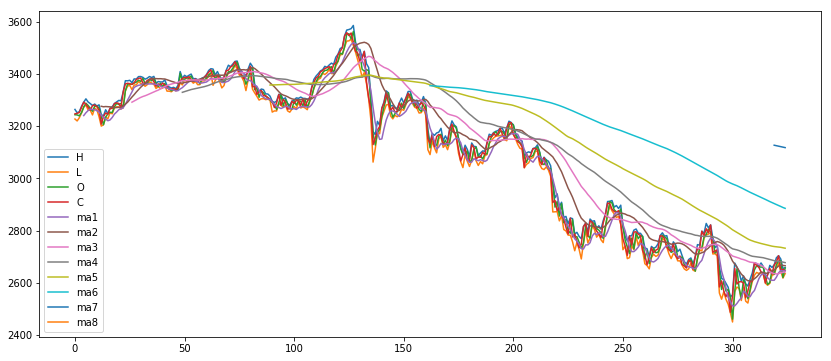

In [3]:
#均线
ax = plt.subplot()
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(O.series, label="O")
ax.plot(C.series, label="C")
ax.plot(MA(L,5).series, label="ma1")
ax.plot(MA(H,13).series, label="ma2")
ax.plot(MA(H,27).series, label="ma3")
ax.plot(MA(H,50).series, label="ma4")
ax.plot(MA(H,90).series, label="ma5")
ax.plot(MA(H,163).series, label="ma6")
ax.plot(MA(H,320).series, label="ma7")
ax.plot(MA(H,810).series, label="ma8")
plt.legend(loc="best")
plt.show()

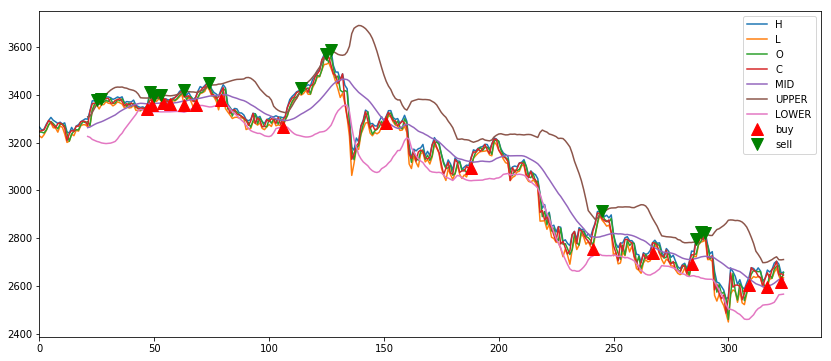

成交市值关系+KDJ显示图及买卖 39686348945400.0 39335174029224.0 8259634028459.514 71.32117774734749 66.94525970257 80.07301383690248


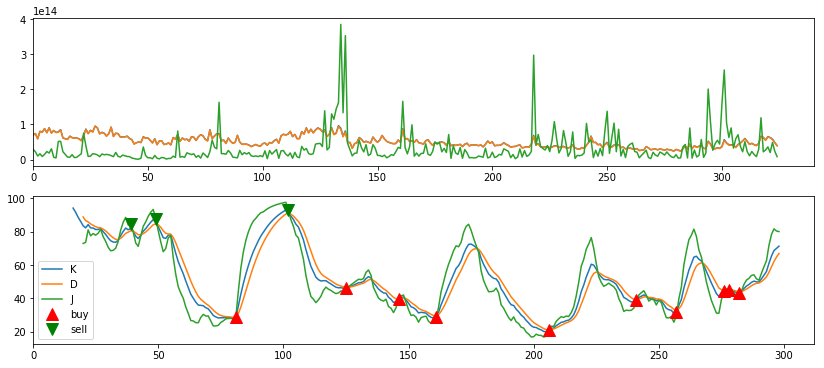

成交量+DMA指标+买卖 -4.844999999999345 -20.919299999998884


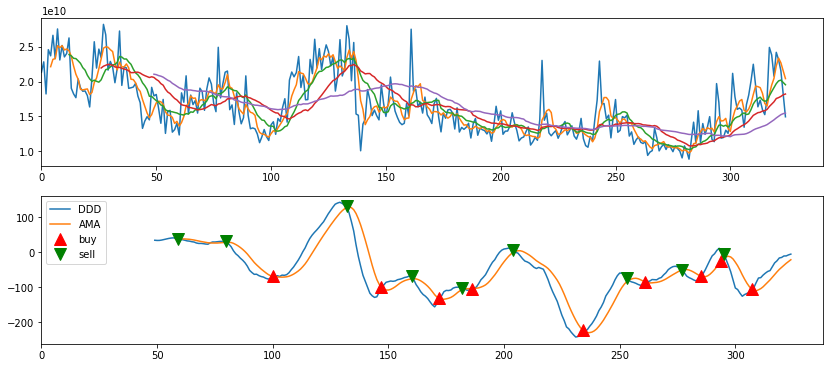

In [4]:
#N=20,P=2 BOLL 布林带
MID = MA((H+L)/2, 22)
UPPER = MID + STD(L, 22) * 2
LOWER = MID - STD(H, 22) * 2
ax = plt.subplot()
buy_signal = CROSS(L, LOWER) or CROSS(L,MID)
sell_signal = CROSS(UPPER,H)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(O.series, label="O")
ax.plot(C.series, label="C")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖
RSV = (HHV(H,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
HV=H*V
LV=L*V
HLV=(HV-LV)*(H-L)
print("成交市值关系+KDJ显示图及买卖",HV,LV,HLV,K, D, J)
f1, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(HV.series, label="HV")
ax1.plot(LV.series, label="LV")
ax1.plot(HLV.series, label="HLV")
ax1.set_xlim(0)
ax2.plot(K.series, label="K")
ax2.plot(D.series, label="D")
ax2.plot(J.series, label="J")
ax2.set_xlim(0)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>70,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票成交量均线+DMA指标+买卖
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print("成交量+DMA指标+买卖",DDD, AMA)
f2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(V.series, label="V")
ax1.plot(MA(V, 5).series, label="ma1")
ax1.plot(MA(V, 13).series, label="ma2")
ax1.plot(MA(V, 27).series, label="ma3")
ax1.plot(MA(V, 50).series, label="ma4")
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(0)
buy_signal = CROSS(IF(DDD<0,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

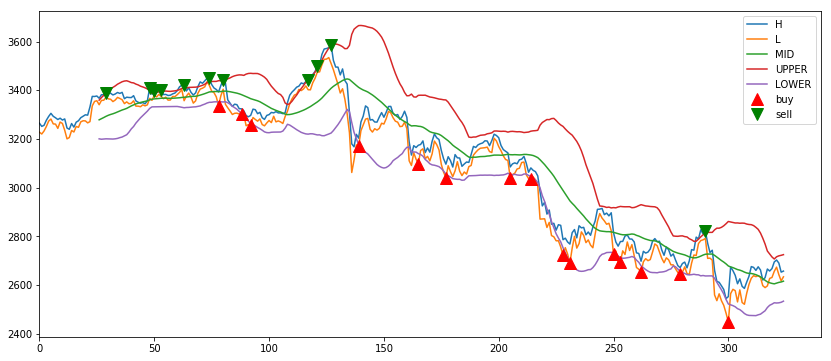

In [5]:
#N=20,P=2 BOLL 布林带
MID = MA((O+H+L+C)/4, 27)
UPPER = MID + STD(L, 27) * 2
LOWER = MID - STD(H, 27) * 2
ax = plt.subplot()
buy_signal = CROSS(L, LOWER) and CROSS(L,MID) 
sell_signal = CROSS(UPPER,H) and CROSS(UPPER,L)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

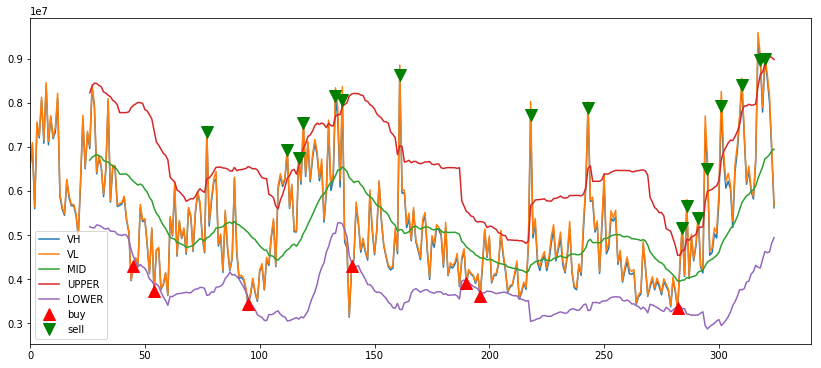

In [6]:
#带量BOLL 布林带
VH=V/(H)
VL=V/(L)
VO=V/(O)
VC=V/(C)
MID = MA((VH+VL)/2, 27)
UPPER = MID + STD(VL, 27) * 1.618
LOWER = MID - STD(VH, 27) * 1.618
ax = plt.subplot()
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)
sell_signal = CROSS(UPPER,VH) and CROSS(MID,VL)
ax.plot(VH.series, label="VH")
ax.plot(VL.series, label="VL")
#ax.plot(VO.series, label="VO")
#ax.plot(VC.series, label="VC")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], VL.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], VH.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

成交量均线+VC -100.79173434880688 -12.147975507758796 -130.06450656347653


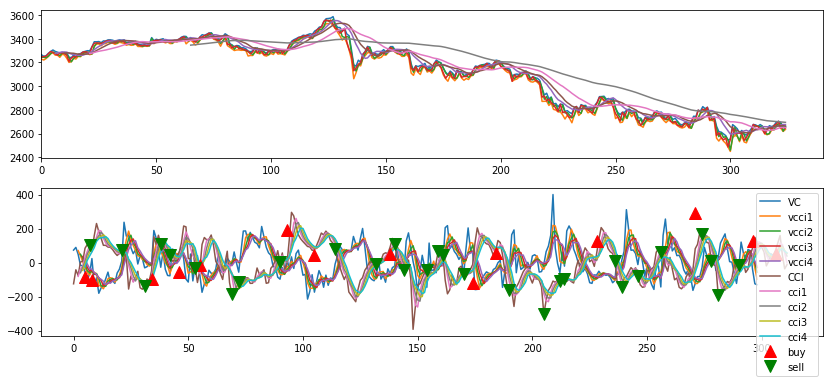

In [7]:
def AVEDEV(value,N):#CCI指标 方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (H+L+C)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (V-MA(V,14))/(0.015*AVEDEV(V,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print ("成交量均线+VC",VCCI,CCI,VC)
f3, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(H.series, label="H")
ax1.plot(L.series, label="L")
ax1.plot(O.series, label="O")
ax1.plot(C.series, label="C")
ax1.plot(MA(H, 7).series, label="ma7")
ax1.plot(MA(H, 11).series, label="ma11")
ax1.plot(MA(H, 22).series, label="ma22")
ax1.plot(MA(H, 66).series, label="ma66")
ax1.set_xlim(0)
ax2.plot(VC.series, label="VC")
ax2.plot(MA(VC,3).series, label="vcci1")
ax2.plot(MA(VC, 4).series, label="vcci2")
ax2.plot(MA(VC, 5).series, label="vcci3")
ax2.plot(MA(VC, 6).series, label="vcci4")
ax2.plot(CCI.series, label="CCI")
ax2.plot(MA(CCI, 3).series, label="cci1")
ax2.plot(MA(CCI, 4).series, label="cci2")
ax2.plot(MA(CCI, 5).series, label="cci3")
ax2.plot(MA(CCI, 6).series, label="cci4")
ax2.set_xlim(-14)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], VCCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

In [8]:
#价量boll

VH=V/(H)
VL=V/(L)
VO=V/(O)
VC=V/(C)
MID = MA((VH+VL)/2, 27)
UPPER = MID + STD(VL, 27) * 1.618
LOWER = MID - STD(VH, 27) * 1.618
buy_signal = CROSS(VL, LOWER) # and CROSS(VL,MID)

VH=(V/H)
VL=(V/L)
VO=(V/O)
VC=(V/C)
MID = (MA(((V/H)+(V/L))/2,27))
UPPER = ((MA(((V/H)+(V/L))/2,27))+STD((V/L),27)*1.618)
LOWER = ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)
buy_signal = CROSS((V/L), ((MA(((V/H)+(V/L))/2,27))-STD((V/H),27)*1.618)) 

# and CROSS(VL,MID)

